In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
sns.set()

In [427]:
df = pd.read_csv('33_Audiobooks_data_Without_Headers.csv')
df.head()

,ID,Book Length(mins)_average,Book Length(mins)_overall,Price_overall,Price_average,Review,Review 10/10,Completion,Minutes_Listened,Support_Requests,Last visited minus Purchase data,Targets
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [428]:
df.shape

(14084, 12)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14084 non-null  int64  
 1   Book Length(mins)_average         14084 non-null  float64
 2   Book Length(mins)_overall         14084 non-null  int64  
 3   Price_overall                     14084 non-null  float64
 4   Price_average                     14084 non-null  float64
 5   Review                            14084 non-null  int64  
 6   Review 10/10                      14084 non-null  float64
 7   Completion                        14084 non-null  float64
 8   Minutes_Listened                  14084 non-null  float64
 9   Support_Requests                  14084 non-null  int64  
 10  Last visited minus Purchase data  14084 non-null  int64  
 11  Targets                           14084 non-null  int64  
dtypes: f

In [430]:
df.isnull().sum()

ID                                  0
Book Length(mins)_average           0
Book Length(mins)_overall           0
Price_overall                       0
Price_average                       0
Review                              0
Review 10/10                        0
Completion                          0
Minutes_Listened                    0
Support_Requests                    0
Last visited minus Purchase data    0
Targets                             0
dtype: int64

In [431]:
df.duplicated().sum()

0

In [432]:
data = df.copy()

In [433]:
data.drop(columns = ['ID'], axis = 1, inplace = True)

In [434]:
data.describe()

,Book Length(mins)_average,Book Length(mins)_overall,Price_overall,Price_average,Review,Review 10/10,Completion,Minutes_Listened,Support_Requests,Last visited minus Purchase data,Targets
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909162,0.125659,189.888983,0.070222,61.935033,0.158833
std,504.340663,654.838599,4.931673,5.560129,0.367313,0.647771,0.241206,371.084010,0.472157,88.207634,0.365533
min,216.000000,216.000000,3.860000,3.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


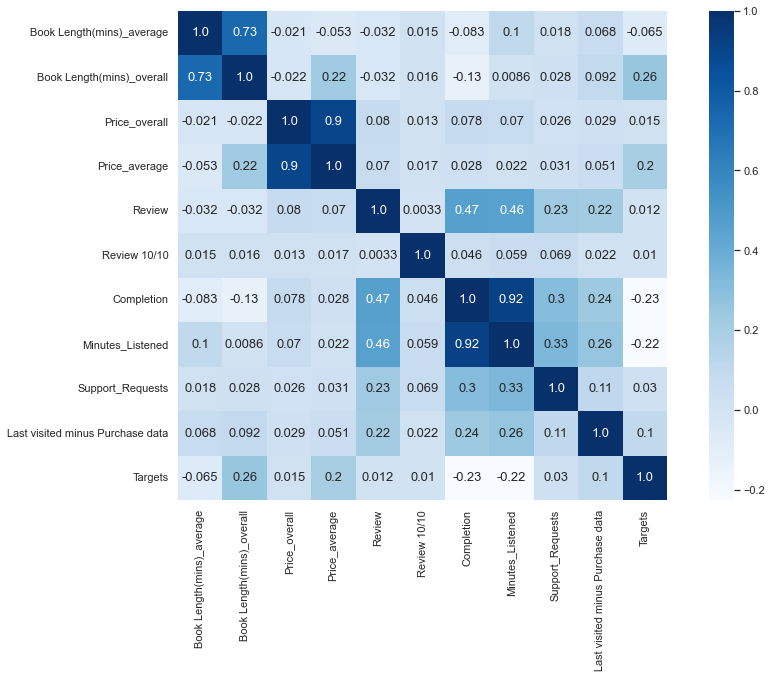

In [435]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(corr_matrix, annot = True, square = True, cbar = True, annot_kws = {'size' : 13}, fmt = '.2', cmap = 'Blues')
plt.show()

In [436]:
data['Targets'].value_counts()

Targets
0    11847
1     2237
Name: count, dtype: int64

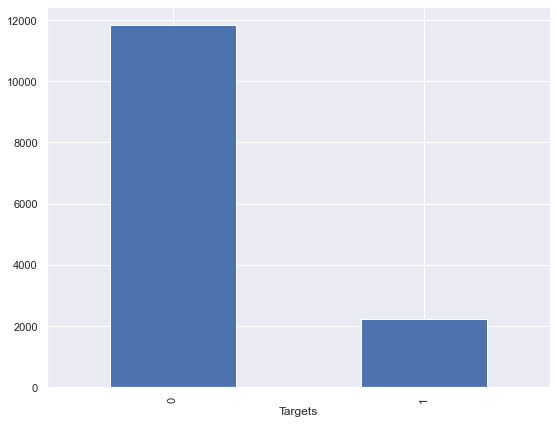

In [437]:
data['Targets'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.show()

In [438]:
data['Review'].value_counts()

Review
0    11820
1     2264
Name: count, dtype: int64

In [439]:
data['Review 10/10'].value_counts()

Review 10/10
8.91     11615
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.67         2
7.50         2
5.50         2
8.33         2
4.50         1
9.67         1
9.40         1
1.50         1
6.67         1
7.75         1
0.00         1
Name: count, dtype: int64

In [440]:
data['Price_per_minutes'] = data['Price_overall'] / data['Book Length(mins)_overall']

In [441]:
data.head()

,Book Length(mins)_average,Book Length(mins)_overall,Price_overall,Price_average,Review,Review 10/10,Completion,Minutes_Listened,Support_Requests,Last visited minus Purchase data,Targets,Price_per_minutes
0,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0,0.012179
1,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0,0.002468
2,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0,0.002468
3,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0,0.003679
4,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0,0.002468


In [442]:
data.corr()['Price_per_minutes']

Book Length(mins)_average          -0.469994
Book Length(mins)_overall          -0.430060
Price_overall                       0.648620
Price_average                       0.541769
Review                              0.071332
Review 10/10                       -0.003555
Completion                          0.086924
Minutes_Listened                   -0.009604
Support_Requests                   -0.004688
Last visited minus Purchase data   -0.047170
Targets                            -0.030552
Price_per_minutes                   1.000000
Name: Price_per_minutes, dtype: float64

In [443]:
data['Support_Requests'].value_counts()

Support_Requests
0     13467
1       410
2       142
3        36
4        12
5         6
6         4
10        2
8         2
7         1
30        1
12        1
Name: count, dtype: int64

In [444]:
data.drop(columns = ['Price_overall', 'Review 10/10', 'Support_Requests'], axis = 'columns', inplace = True)

In [445]:
data.head()

,Book Length(mins)_average,Book Length(mins)_overall,Price_average,Review,Completion,Minutes_Listened,Last visited minus Purchase data,Targets,Price_per_minutes
0,1620.0,1620,19.73,1,0.99,1603.8,92,0,0.012179
1,2160.0,2160,5.33,0,0.00,0.0,0,0,0.002468
2,2160.0,2160,5.33,0,0.00,0.0,388,0,0.002468
3,1620.0,1620,5.96,0,0.42,680.4,129,0,0.003679
4,2160.0,2160,5.33,0,0.22,475.2,361,0,0.002468


In [446]:
data.describe()

,Book Length(mins)_average,Book Length(mins)_overall,Price_average,Review,Completion,Minutes_Listened,Last visited minus Purchase data,Targets,Price_per_minutes
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1591.281685,1678.608634,7.543805,0.160750,0.125659,189.888983,61.935033,0.158833,0.005313
std,504.340663,654.838599,5.560129,0.367313,0.241206,371.084010,88.207634,0.365533,0.006447
min,216.000000,216.000000,3.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000666
25%,1188.000000,1188.000000,5.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003204
50%,1620.000000,1620.000000,6.070000,0.000000,0.000000,0.000000,11.000000,0.000000,0.003986
75%,2160.000000,2160.000000,8.000000,0.000000,0.130000,194.400000,105.000000,0.000000,0.005111
max,2160.000000,7020.000000,130.940000,1.000000,1.000000,2160.000000,464.000000,1.000000,0.202932


In [447]:
data.shape

(14084, 9)

In [448]:
data.columns

Index(['Book Length(mins)_average', 'Book Length(mins)_overall',
       'Price_average', 'Review', 'Completion', 'Minutes_Listened',
       'Last visited minus Purchase data', 'Targets', 'Price_per_minutes'],
      dtype='object')

In [449]:
inputs = ['Book Length(mins)_average', 'Book Length(mins)_overall',
       'Price_average', 'Review', 'Completion', 'Minutes_Listened',
       'Last visited minus Purchase data', 'Price_per_minutes']

In [450]:
target = ['Targets']

In [451]:
data.groupby('Targets').mean()

,Book Length(mins)_average,Book Length(mins)_overall,Price_average,Review,Completion,Minutes_Listened,Last visited minus Purchase data,Price_per_minutes
Targets,,,,,,,,
0,1605.477842,1605.477842,7.070893,0.158859,0.149386,225.744614,58.020258,0.005399
1,1516.099802,2065.904336,10.048315,0.170764,0.000000,0.000000,82.667412,0.004860


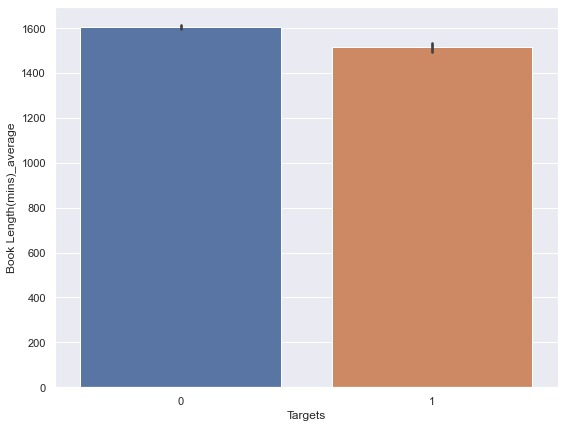

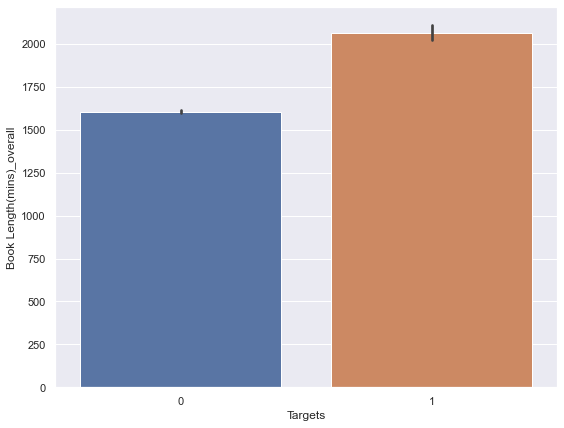

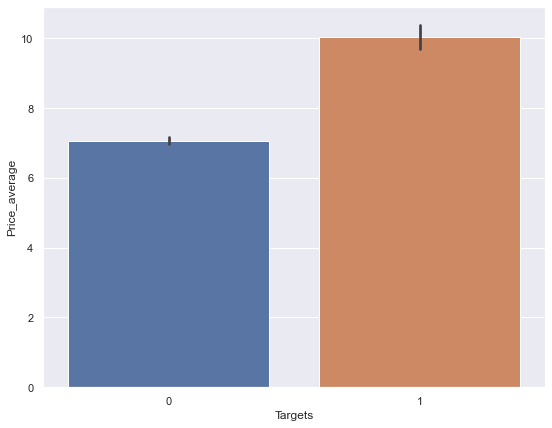

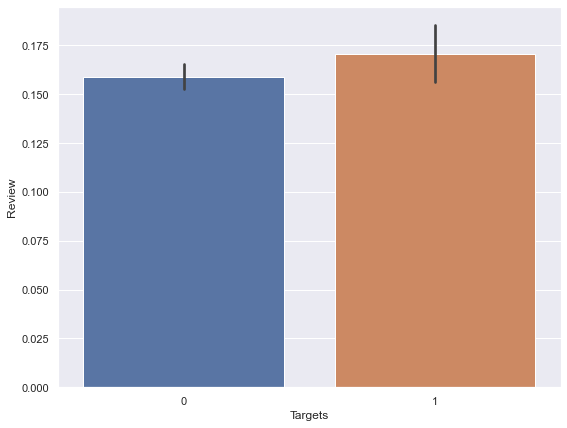

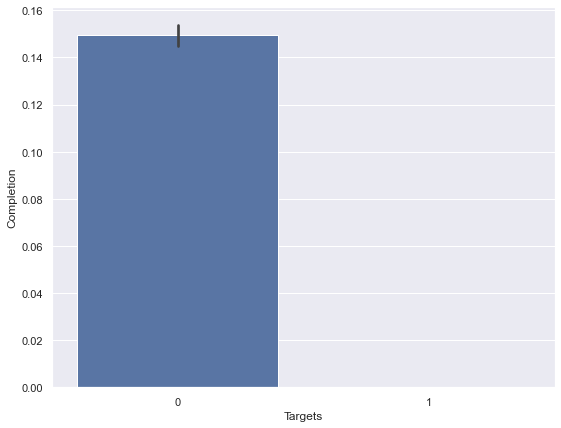

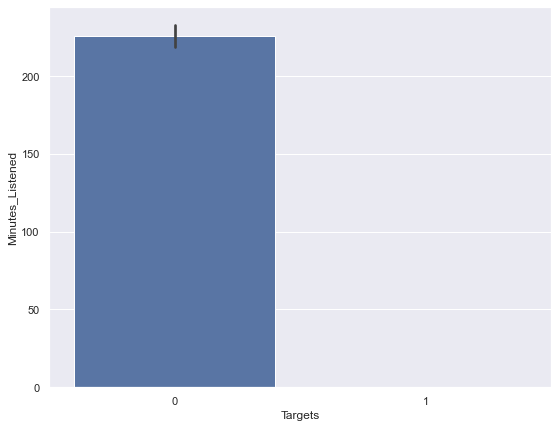

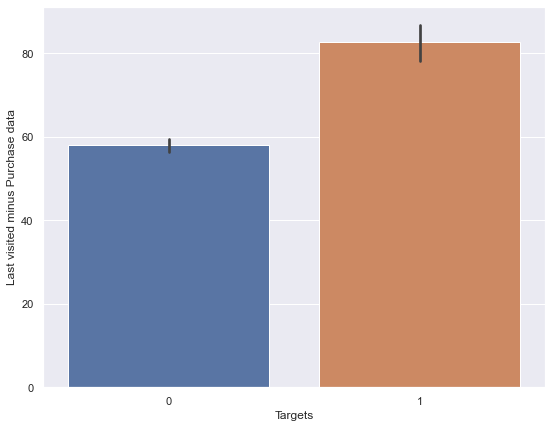

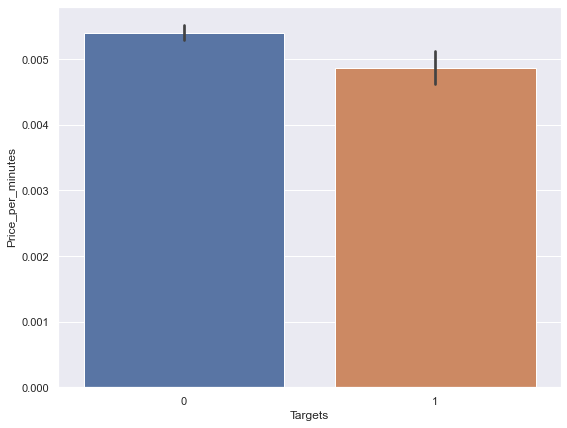

In [452]:
for i in inputs:
    for j in target:
        plt.figure(figsize = (9, 7))
        sns.barplot(data = data, x = j, y = i)
        plt.show()

## According to the drawn bar plot charts, the following information is extracted:

1. The more the number of audio book minutes of customers, the more likely they will buy audio books again, and the more customers buy audio books with fewer minutes, the less likely they will buy them again. This could be because customers who buy smaller books have less interaction with the store or are not professional readers.


2. It is more likely that customers who pay more for audio books will buy books from the store again than customers who have spent less money for books.


3. Customers who bought books from the store again were more satisfied with their purchase. This satisfaction is less in customers who have not bought from the store again.


4. Customers who have not bought from the store again, are reading a part of the book they have already bought, or have read these books to some extent and have not decided to read the book or buy a newer book. But repeat customers read very little of their book. This could be because they have just bought the book and haven't had enough time to move forward with their reading. There is also a possibility that these customers, in addition to the book they just bought, bought a newer book or did not read their previous book at all and decided to buy a newer book. Also, this could be because the data on repeat customers is new and this type of customer has not yet listened to their book.


5. It is clear that customers who bought books from the store interacted more with the store than customers who did not intend to buy new books.


6. The lower the price of a book, the more likely customers will buy from the store again. Customers who have paid a high price for a unique book are more likely than other customers not to buy from the store again.

In [453]:
inputs

['Book Length(mins)_average',
 'Book Length(mins)_overall',
 'Price_average',
 'Review',
 'Completion',
 'Minutes_Listened',
 'Last visited minus Purchase data',
 'Price_per_minutes']

In [454]:
cols1 = ['Book Length(mins)_average',
 'Book Length(mins)_overall',
 'Price_average',
 'Completion',
 'Minutes_Listened',
 'Last visited minus Purchase data',
 'Price_per_minutes']

In [455]:
cols2 = ['Review']

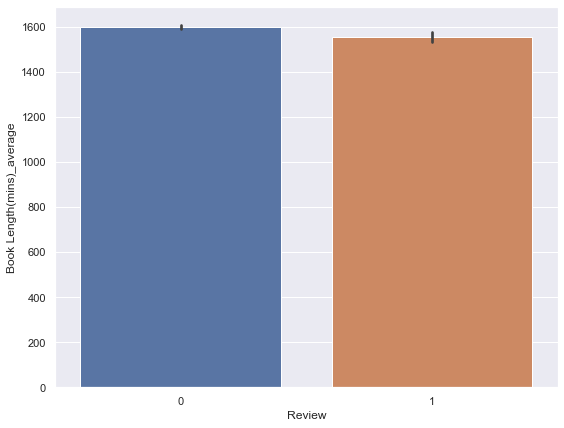

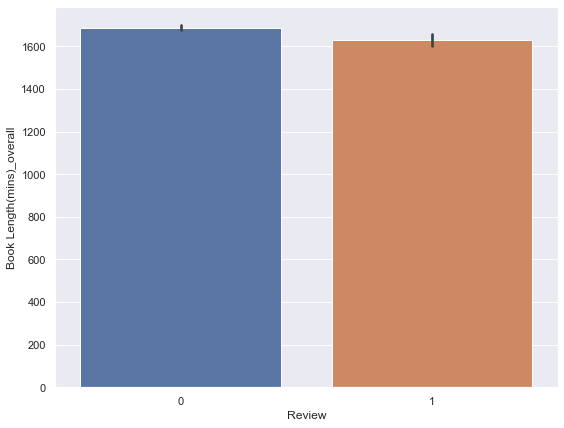

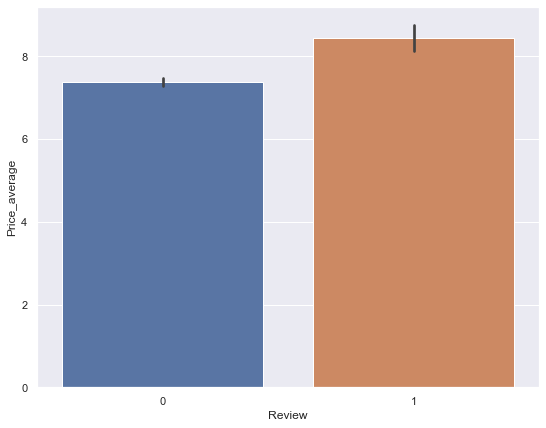

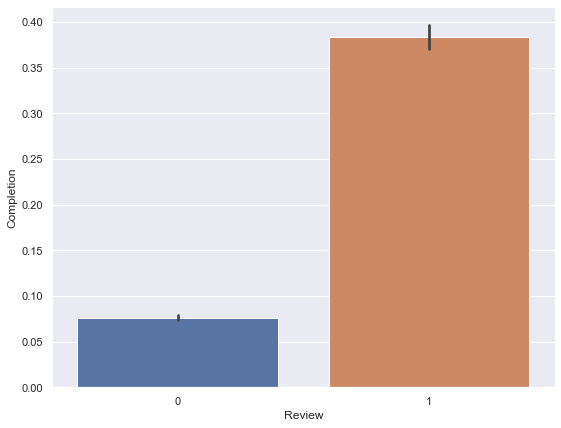

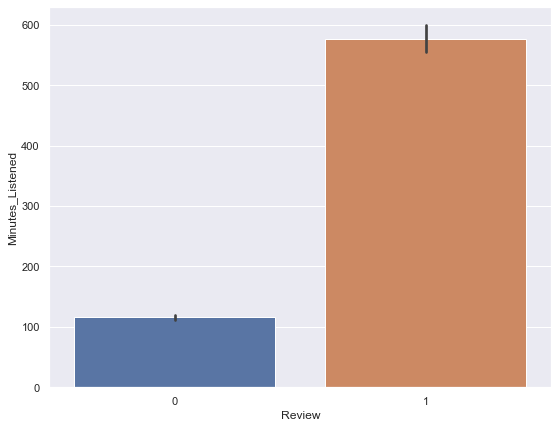

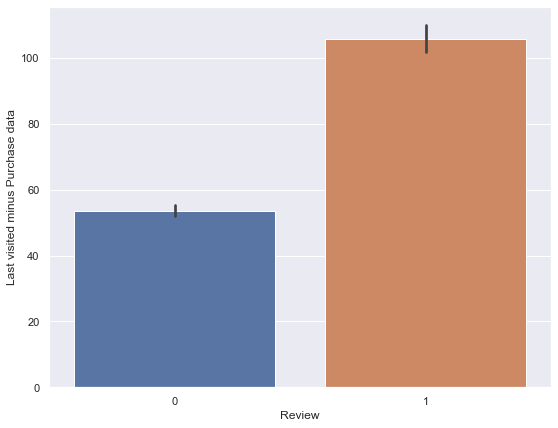

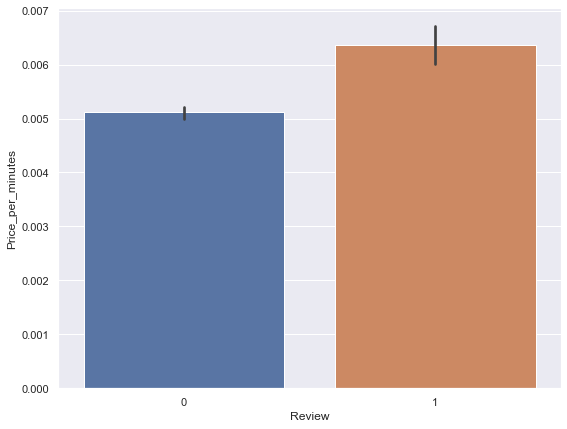

In [456]:
for i in cols2:
    for j in cols1:
        plt.figure(figsize = (9, 7))
        sns.barplot(data, x = i, y = j)
        plt.show()

## According to the drawn bar plot charts, the following information is extracted:

1. The lower the average purchase cost of customers from the store, the more satisfied they will be with their purchase.

2. Customers are more satisfied with their purchase if they have listened to a larger part of their book.

3. Customers who interacted more with the store were more satisfied with their shopping experience.

4. The less customers pay for each book, the more satisfied they will be with their purchase.

In [457]:
def scatter_plot(data, x, y, hue):
    plt.figure(figsize = (9, 7))
    sns.scatterplot(data = data, x = x, y = y, hue = hue)
    plt.show()

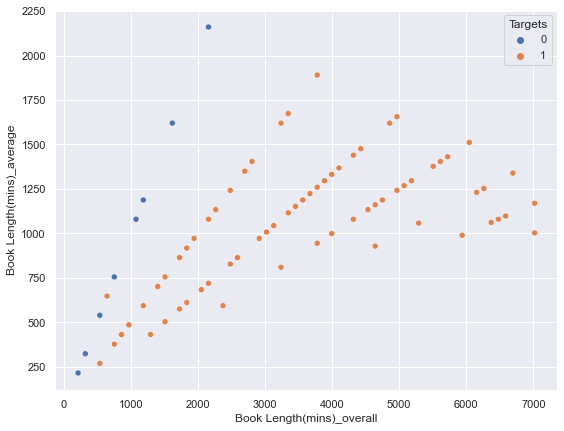

In [458]:
scatter_plot(data, 'Book Length(mins)_overall', 'Book Length(mins)_average', 'Targets')

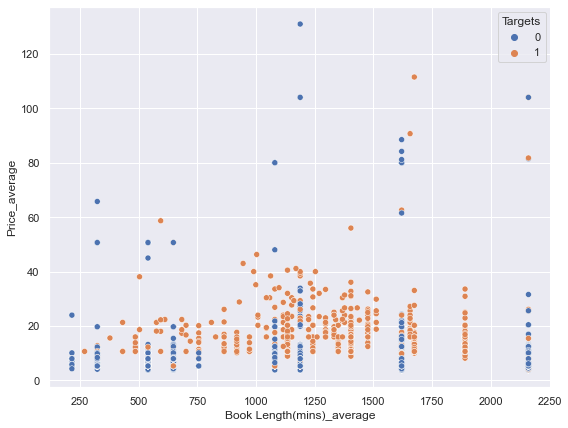

In [459]:
scatter_plot(data, 'Book Length(mins)_average', 'Price_average', 'Targets')

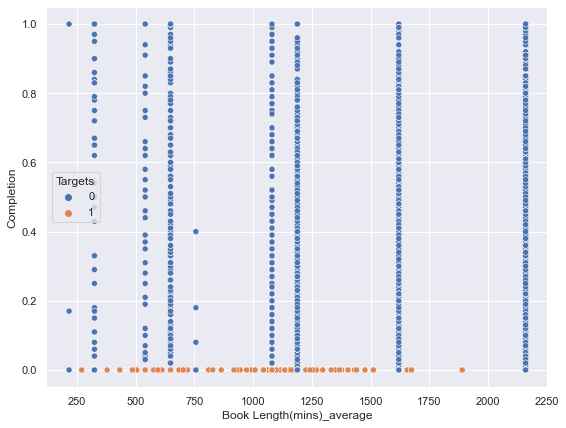

In [460]:
scatter_plot(data, 'Book Length(mins)_average', 'Completion', 'Targets')

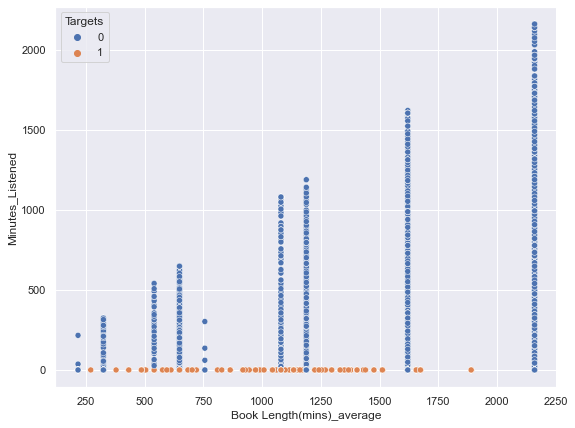

In [461]:
scatter_plot(data, 'Book Length(mins)_average', 'Minutes_Listened', 'Targets')

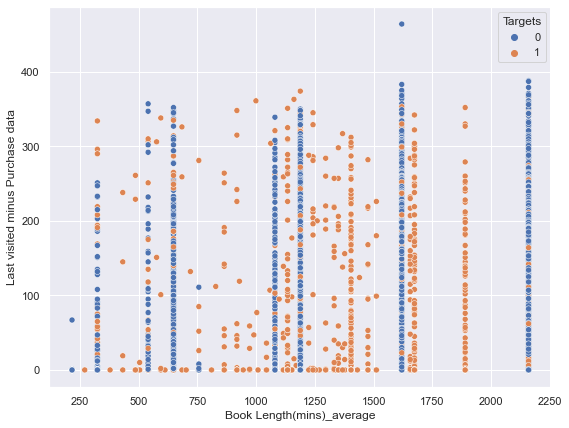

In [462]:
scatter_plot(data, 'Book Length(mins)_average', 'Last visited minus Purchase data', 'Targets')

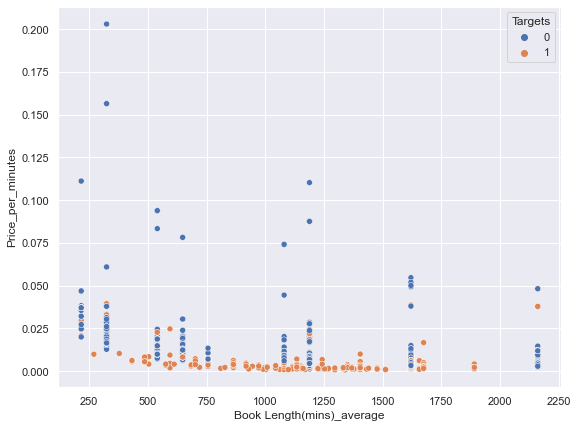

In [463]:
scatter_plot(data, 'Book Length(mins)_average', 'Price_per_minutes', 'Targets')

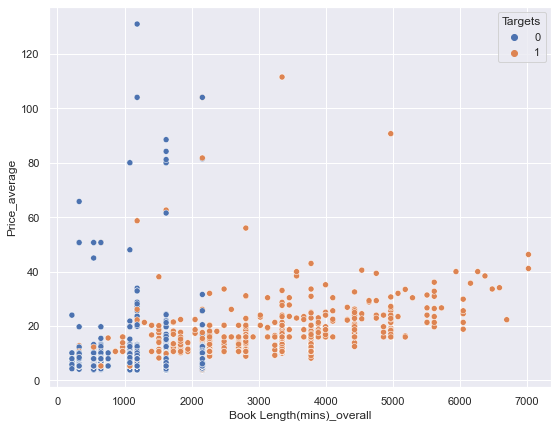

In [464]:
scatter_plot(data, 'Book Length(mins)_overall', 'Price_average', 'Targets')

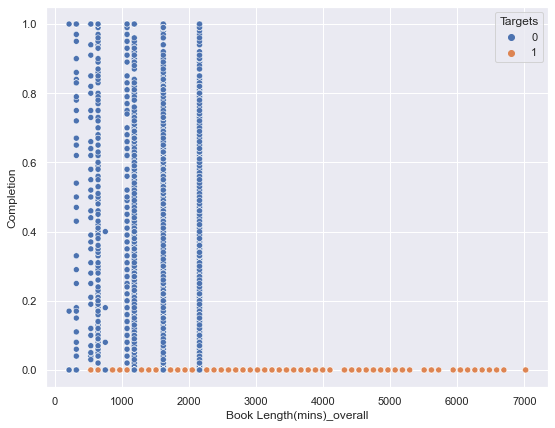

In [465]:
scatter_plot(data, 'Book Length(mins)_overall', 'Completion', 'Targets')

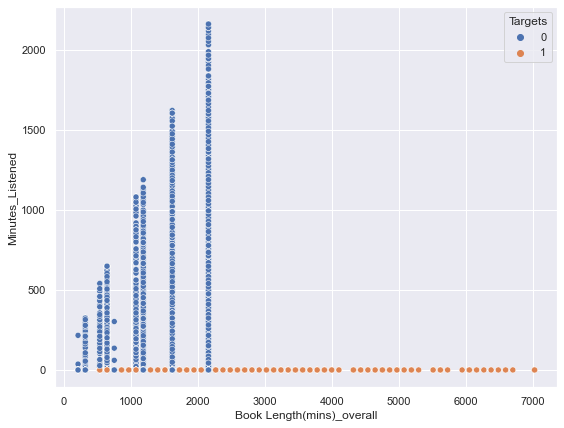

In [466]:
scatter_plot(data, 'Book Length(mins)_overall', 'Minutes_Listened', 'Targets')

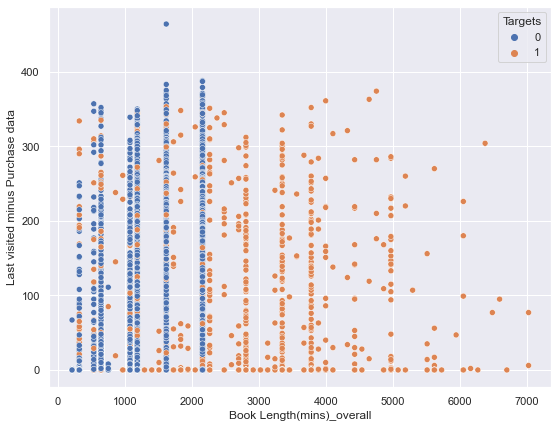

In [467]:
scatter_plot(data, 'Book Length(mins)_overall', 'Last visited minus Purchase data', 'Targets')

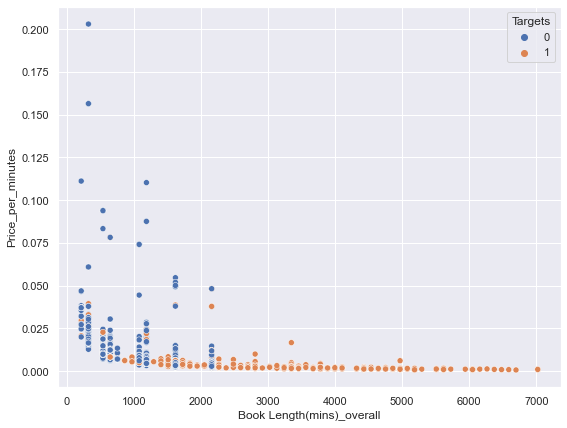

In [468]:
scatter_plot(data, 'Book Length(mins)_overall', 'Price_per_minutes', 'Targets')

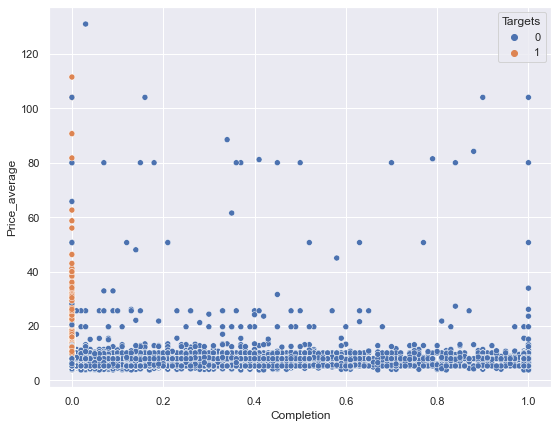

In [469]:
scatter_plot(data, 'Completion', 'Price_average', 'Targets')

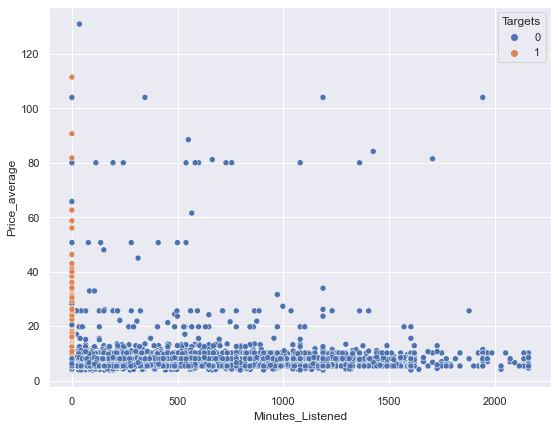

In [470]:
scatter_plot(data, 'Minutes_Listened', 'Price_average', 'Targets')

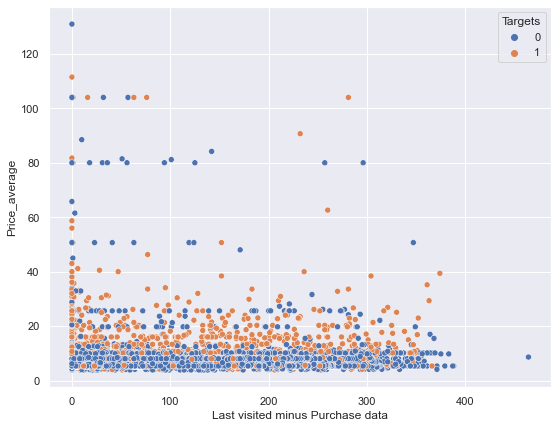

In [471]:
scatter_plot(data, 'Last visited minus Purchase data', 'Price_average', 'Targets')

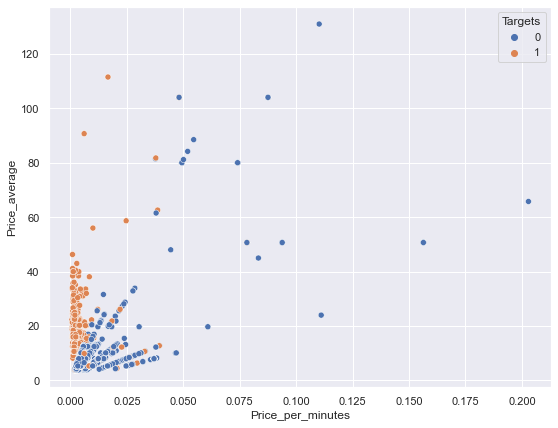

In [472]:
scatter_plot(data, 'Price_per_minutes', 'Price_average', 'Targets')

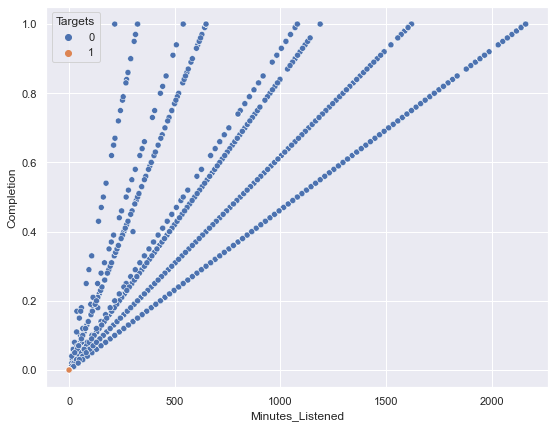

In [473]:
scatter_plot(data, 'Minutes_Listened', 'Completion', 'Targets')

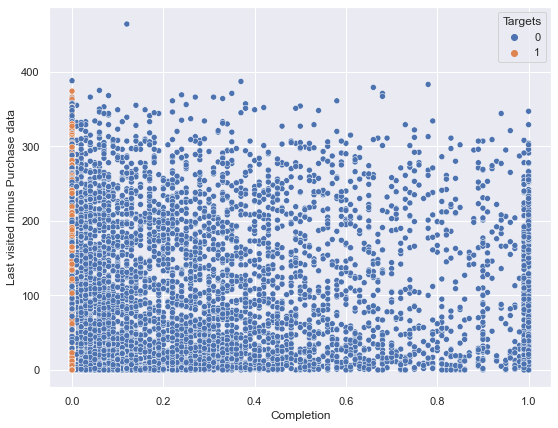

In [474]:
scatter_plot(data, 'Completion', 'Last visited minus Purchase data', 'Targets')

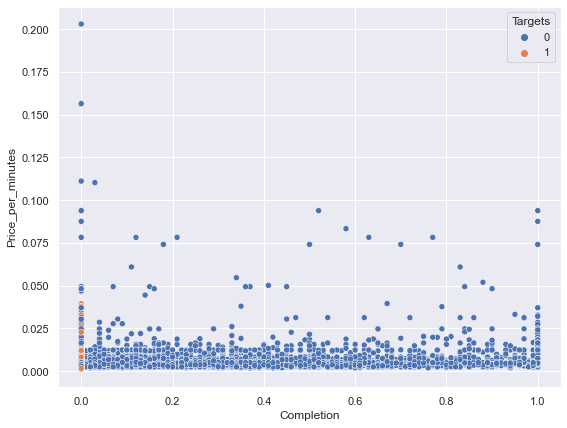

In [475]:
scatter_plot(data, 'Completion', 'Price_per_minutes', 'Targets')

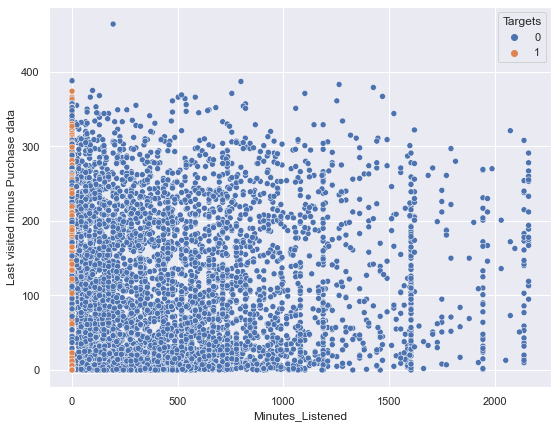

In [476]:
scatter_plot(data, 'Minutes_Listened', 'Last visited minus Purchase data', 'Targets')

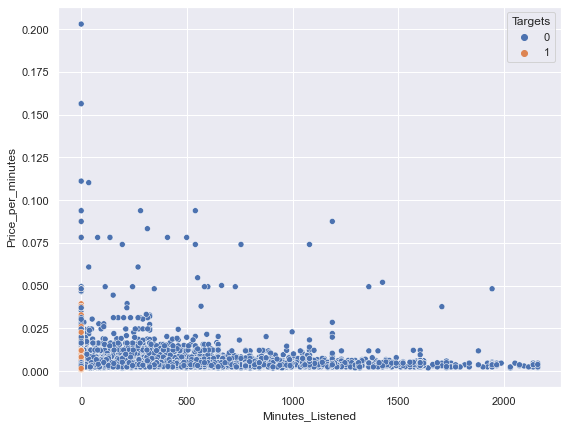

In [477]:
scatter_plot(data, 'Minutes_Listened', 'Price_per_minutes', 'Targets')

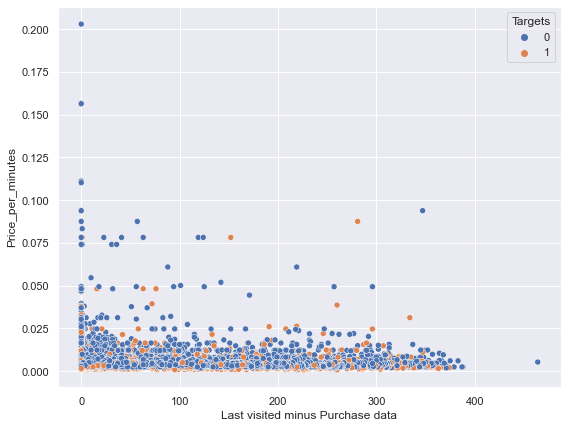

In [478]:
scatter_plot(data, 'Last visited minus Purchase data', 'Price_per_minutes', 'Targets')

## According to the drawn scatter plot diagrams, the following information is extracted:

1. Customers whose total minutes of audio books are less than 2200 minutes may not buy from the store again, but customers whose total minutes of audio books are more than 2200 minutes will definitely buy from the store again. . This could be because they are professional readers.

2. Customers who paid more for books are more likely to buy from the store again, which could be because they are professional readers and pay more for books. Usually, customers who have bought books with a length of 850 to 1500 minutes at an average price, have been encouraged to buy again from the store more than other customers.

3. The more minutes of books purchased by customers, the more time they listen to the purchased books.

4. Customers whose average number of minutes of purchased books is less than 1050 minutes are most likely not to buy from the store again.

5. Customers whose total minutes of purchased books are more than 2200 minutes have not listened to their book at all. This could be because the data of customers who have bought from the store again is new, and this type of customer has not yet listened to their book.

6. The less customers pay for books, the more they will interact with the store.

7. As the amount of listening to books purchased by customers increases, the amount of interaction with the store also decreases. This is due to the fact that whenever customers get closer to the end of a book, the number of visits to the store to listen to that book also decreases. But whenever a customer finishes a book, his interaction with the store increases, which may be because he intends to buy a new book.

8. The less customers pay for a book, the more they will listen to it.

9. The higher the cost of buying a book, the less customers will interact with the store.

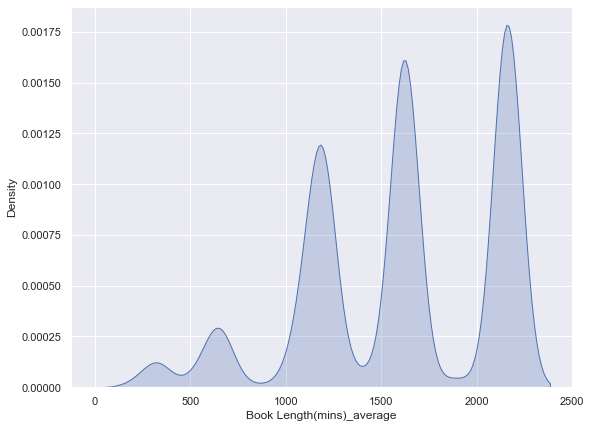

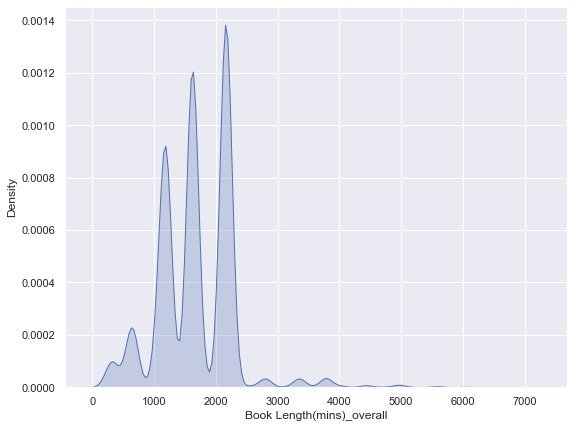

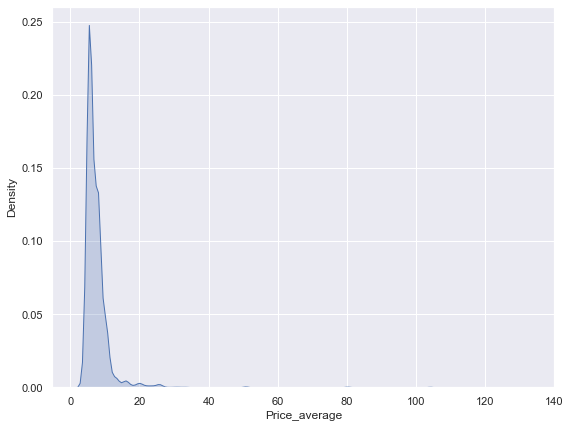

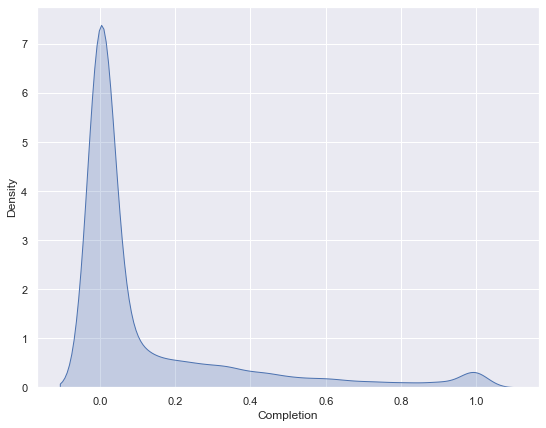

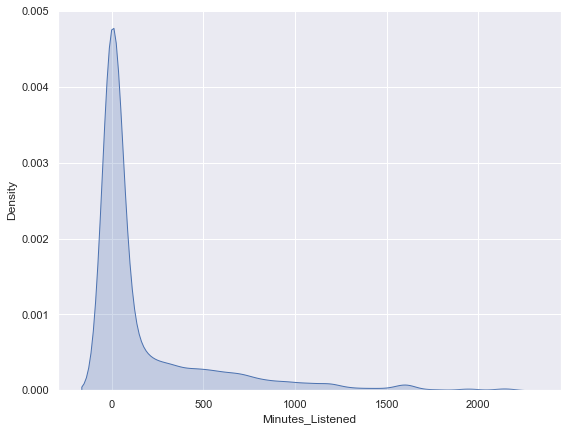

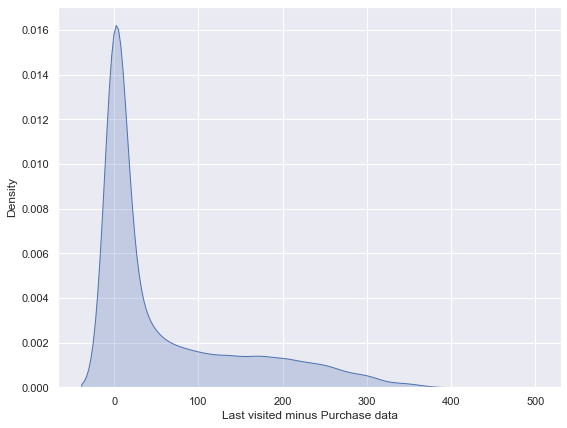

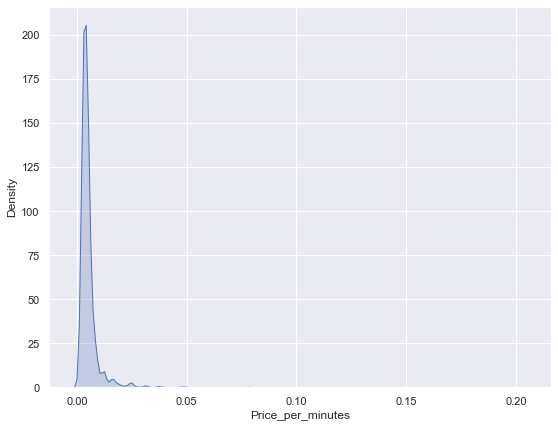

In [479]:
for column in cols1:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

## According to the kde plot diagram, the following information is extracted:

1. The most average minutes of purchased audio books are between 850 and 2400 minutes.

2. In general, the number of minutes of audio books purchased by customers from the store is mostly between 500 and 2400 minutes.

3. Usually, the average price of purchased books is between 1 and 15 dollars.

4. By the time of data collection, customers have usually heard up to 20% of the books.

5. Usually, customers have listened to the purchased books for up to 500 minutes.

In [480]:
data.head()

,Book Length(mins)_average,Book Length(mins)_overall,Price_average,Review,Completion,Minutes_Listened,Last visited minus Purchase data,Targets,Price_per_minutes
0,1620.0,1620,19.73,1,0.99,1603.8,92,0,0.012179
1,2160.0,2160,5.33,0,0.00,0.0,0,0,0.002468
2,2160.0,2160,5.33,0,0.00,0.0,388,0,0.002468
3,1620.0,1620,5.96,0,0.42,680.4,129,0,0.003679
4,2160.0,2160,5.33,0,0.22,475.2,361,0,0.002468


In [481]:
data.shape

(14084, 9)

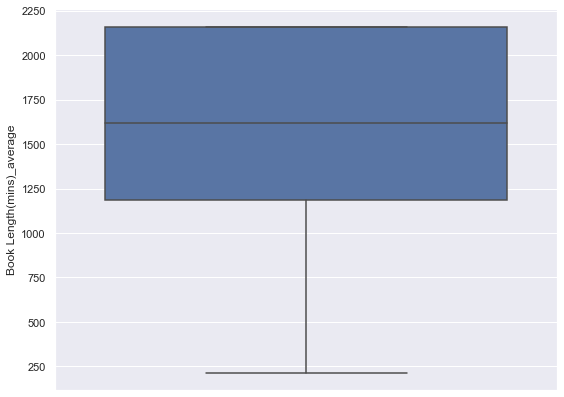

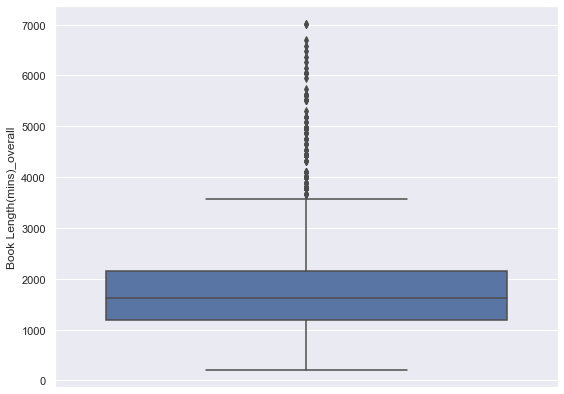

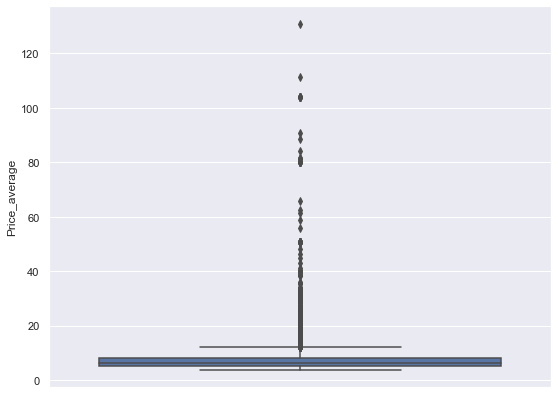

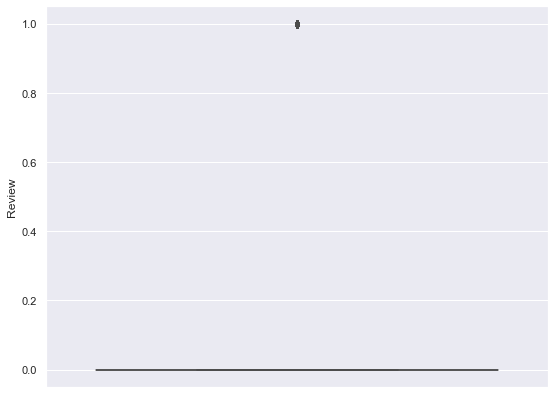

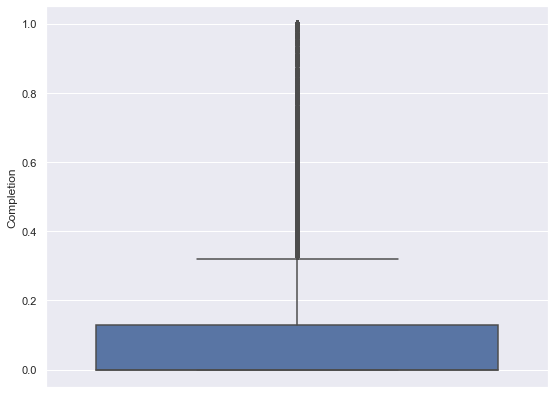

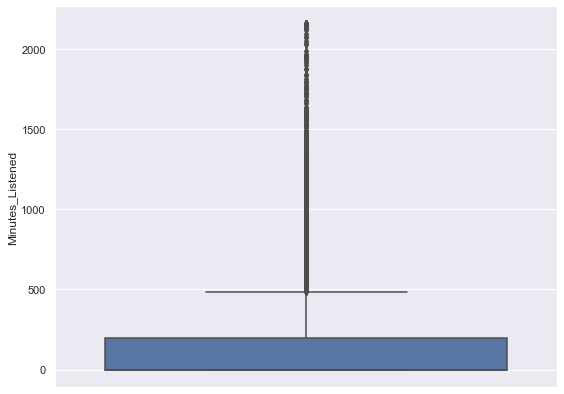

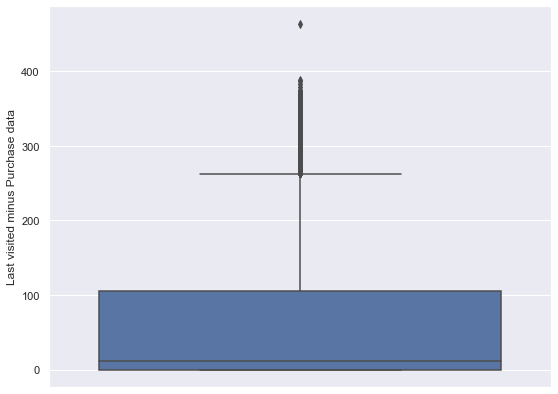

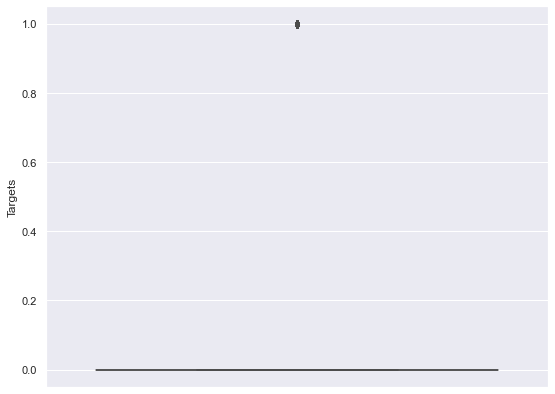

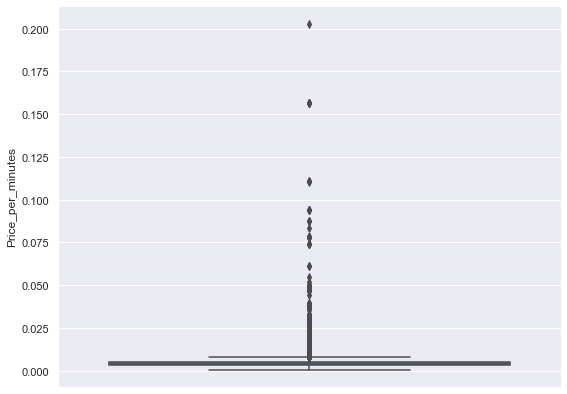

In [482]:
for column in data.columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data, y = column)
    plt.show()

In [483]:
data[data['Book Length(mins)_overall'] > 3700].shape

(244, 9)

In [484]:
data = data[data['Book Length(mins)_overall'] < 3700]

In [485]:
data[data['Price_average'] > 11].shape

(624, 9)

In [486]:
data = data[data['Price_average'] < 11]

In [487]:
data['Review'].value_counts()

Review
0    11142
1     2074
Name: count, dtype: int64

In [488]:
data[data['Completion'] > 0.5].shape

(1192, 9)

In [489]:
data = data[data['Completion'] < 0.5]

In [490]:
data[data['Minutes_Listened'] > 500].shape

(865, 9)

In [491]:
data = data[data['Minutes_Listened'] < 500]

In [492]:
data[data['Last visited minus Purchase data'] > 270].shape

(319, 9)

In [493]:
data = data[data['Last visited minus Purchase data'] < 270]

In [494]:
data[data['Price_per_minutes'] > 0.0125].shape

(374, 9)

In [495]:
data = data[data['Price_per_minutes'] < 0.0125]

In [496]:
data.shape

(10429, 9)

In [497]:
data['Review'].value_counts()

Review
0    9568
1     861
Name: count, dtype: int64

In [498]:
data.drop(columns = ['Review'], axis = 1, inplace = True)

In [499]:
data.head()

,Book Length(mins)_average,Book Length(mins)_overall,Price_average,Completion,Minutes_Listened,Last visited minus Purchase data,Targets,Price_per_minutes
1,2160.0,2160,5.33,0.00,0.0,0,0,0.002468
5,2160.0,2160,4.61,0.00,0.0,0,0,0.002134
7,648.0,648,5.33,0.00,0.0,0,1,0.008225
10,540.0,540,5.33,0.28,151.2,34,0,0.009870
11,2160.0,2160,5.33,0.00,0.0,0,1,0.002468


In [500]:
data.shape

(10429, 8)

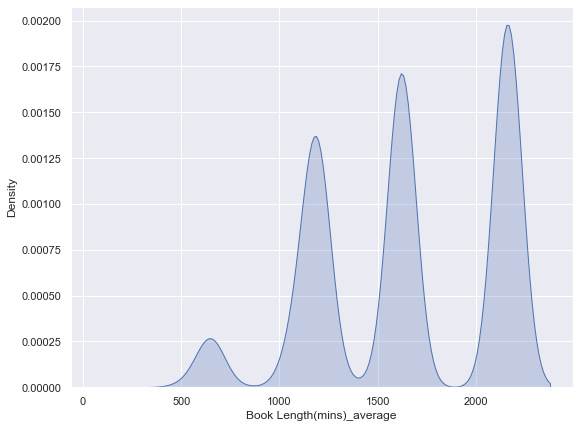

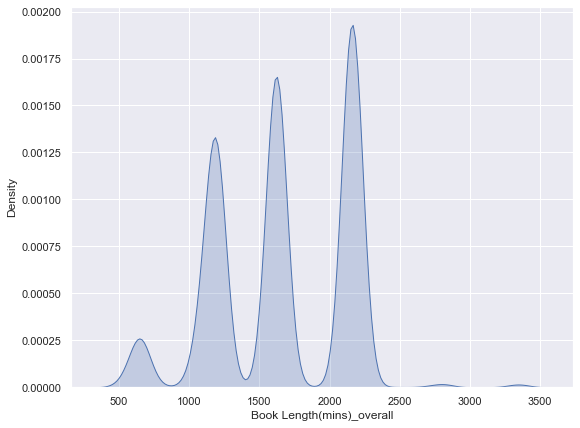

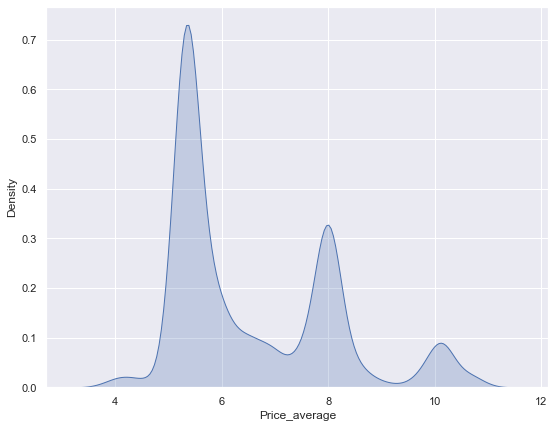

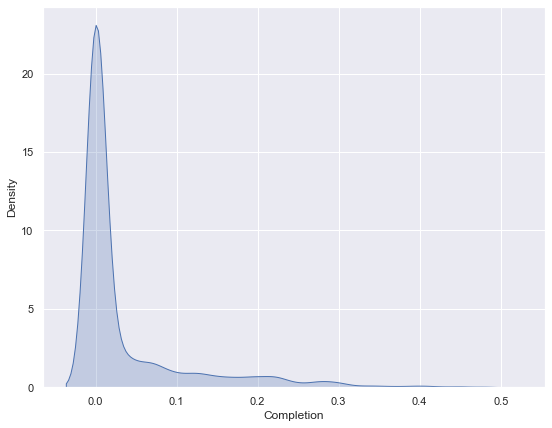

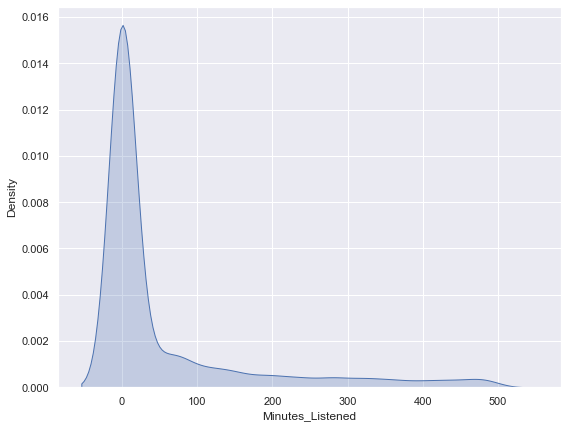

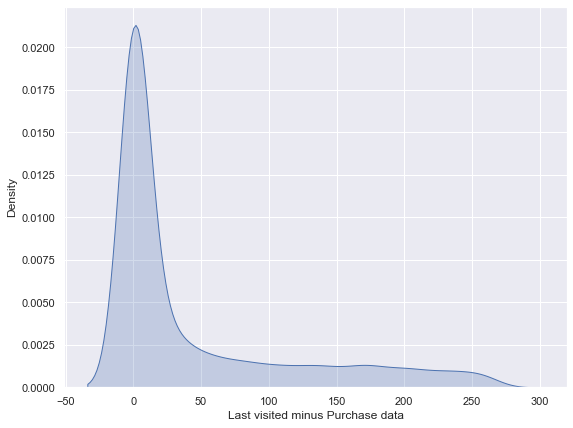

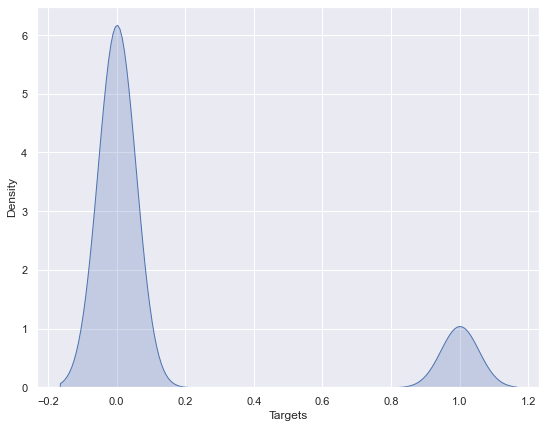

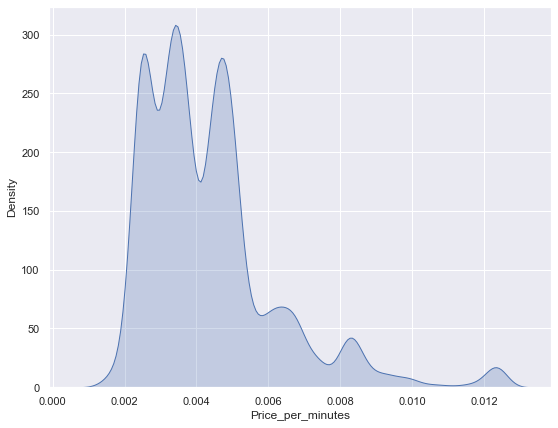

In [501]:
for column in data.columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [502]:
data[data['Book Length(mins)_overall'] > 2500].shape

(67, 8)

In [503]:
data = data[data['Book Length(mins)_overall'] < 2500]

In [504]:
data[data['Completion'] > 0.2].shape

(633, 8)

In [505]:
data = data[data['Completion'] < 0.2]

In [506]:
data[data['Minutes_Listened'] > 200].shape

(502, 8)

In [507]:
data = data[data['Minutes_Listened'] < 200]

In [508]:
data[data['Last visited minus Purchase data'] > 200].shape

(534, 8)

In [509]:
data = data[data['Last visited minus Purchase data'] < 200]

In [510]:
data[data['Price_per_minutes'] > 0.010].shape

(139, 8)

In [511]:
data = data[data['Price_per_minutes'] < 0.010]

In [512]:
data.shape

(8459, 8)

In [513]:
data['Targets'].value_counts()

Targets
0    7197
1    1262
Name: count, dtype: int64

In [514]:
scaler = StandardScaler()

In [515]:
X = data.drop(columns = ['Targets'], axis = 1)
y = data['Targets']

In [516]:
X_scaled = scaler.fit_transform(X)

In [517]:
smote = SMOTE(sampling_strategy = 'not majority')

In [518]:
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [519]:
X_sm = np.array(X_sm)
y_sm = np.array(y_sm)

In [520]:
X_sm.shape

(14394, 7)

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 101, stratify = y_sm, 
                                                   shuffle = True)

In [522]:
X_train.shape

(11515, 7)

In [523]:
print('The training set size is:', X_train.shape[0])
print('The test set size is:', X_test.shape[0])

The training set size is: 11515
The test set size is: 2879


In [524]:
model = Sequential()

In [525]:
model.add(Flatten(input_shape = (7, )))
model.add(Dense(512, activation = 'leaky_relu'))
model.add(Dense(256, activation = 'leaky_relu'))
model.add(Dense(128, activation = 'leaky_relu'))
model.add(Dense(64, activation = 'leaky_relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [526]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [527]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [528]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6800 - loss: 0.5648 - val_accuracy: 0.7188 - val_loss: 0.5136
Epoch 2/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7012 - loss: 0.5286 - val_accuracy: 0.7240 - val_loss: 0.5023
Epoch 3/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7054 - loss: 0.5251 - val_accuracy: 0.7188 - val_loss: 0.5072
Epoch 4/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6960 - loss: 0.5328 - val_accuracy: 0.7292 - val_loss: 0.5004
Epoch 5/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7177 - loss: 0.5219 - val_accuracy: 0.7144 - val_loss: 0.5030
Epoch 6/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7047 - loss: 0.5343 - val_accuracy: 0.7378 - val_loss: 0.5012


In [529]:
model.evaluate(X_test, y_test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5415


[0.5357755422592163, 0.7137895226478577]

In [530]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101, stratify = y,
                                                       shuffle = True)

In [531]:
model2 = Sequential()

In [532]:
model2.add(Flatten(input_shape = (7, )))
model2.add(Dense(512, activation = 'leaky_relu'))
model2.add(Dense(256, activation = 'leaky_relu'))
model2.add(Dense(128, activation = 'leaky_relu'))
model2.add(Dense(64, activation = 'leaky_relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [533]:
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [534]:
history2 = model2.fit(X_train2, y_train2, epochs = 100, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8345 - loss: 0.3981 - val_accuracy: 0.8634 - val_loss: 0.3394
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.3416 - val_accuracy: 0.8619 - val_loss: 0.3162
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3392 - val_accuracy: 0.8582 - val_loss: 0.3240
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8605 - loss: 0.3337 - val_accuracy: 0.8612 - val_loss: 0.3353


In [544]:
model2.evaluate(X_test2, y_test2)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3439


[0.3633897602558136, 0.8534278869628906]

In [545]:
y_p = model2.predict(X_test2)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [546]:
y_pred = np.where(y_p > 0.5, 1, 0)

In [547]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1440
           1       0.61      0.04      0.08       252

    accuracy                           0.85      1692
   macro avg       0.73      0.52      0.50      1692
weighted avg       0.82      0.85      0.80      1692



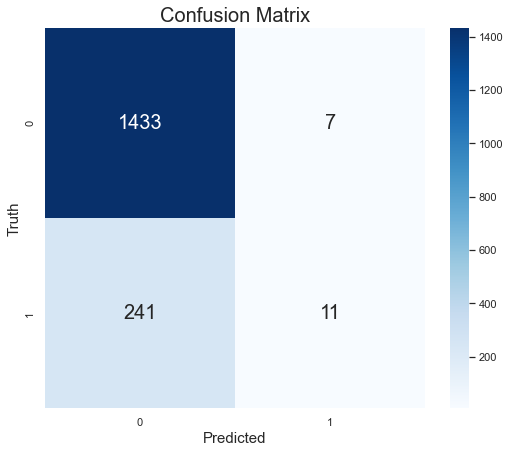

In [548]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test2, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()

## Based on the information extracted from the data, the following suggestions are made to encourage customers to buy again from the audio book store:

1. Customers should be offered to buy books with 850 to 1500 pages so that the customer's interaction with the store does not decrease due to the small volume of the purchased book.

2. By providing services such as providing discount codes or gifts to customers who buy from the store for the first time, to increase their satisfaction from the first purchase.

3. To the customers who have bought a book, suggest reading that book regularly so that they will be more encouraged to listen to the purchased book until the end so that they will be more willing to buy a new book after finishing the book. In order to encourage customers to finish the purchased books, they can be presented with an exciting advertisement of the purchased book.

4. To encourage customers to buy from the store again, it is possible to increase their interaction with the store. To increase this amount of interaction, online games based on scientific knowledge can be held in the store so that customers can win discount codes by playing and increasing interaction in the store.

5. As far as possible, the price of the books should be lower or along with their purchase, cash prizes should be considered for the next purchase of the customers.

6. Whenever a customer reaches the end of listening to a book he has already purchased, increase the customer's interaction with the store. This can be done by offering to buy books similar to the book that the customer has already bought, or by offering a game to win discount codes, etc.

7. Whenever a customer has listened to 15-20% of the book he bought, he will receive exciting messages from the continuation of the story of that book to make him more inclined to finish his book, because most customers average 20 The percentage of their books have been listened to.

8. As much as possible, try to offer books with a price of 1 to 15 dollars for customers.